# M26 Cálculo - Tarefa 02

1- Calcule de forma numérica a integral da função $x^3$ avaliada entre os pontos $1$ e $2$. Identifique o número de retângulos que você usou.  
2- Calcule essa área de forma analítica.

In [ ]:
# Álgebra Linear Básica

Este material complementa os slides apresentados no video.

Neste notebook vamos exercitar alguns conceitos de álgebra linear utilizando o numpy e plotando com o matplotlib.

Os objetivo são:

- Familiarização com os conceitos de vetor
- Criar uma intuição sobre transformações lineares
- Entender onde operações matriciais podem entrar em ciência de dados.

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

## Vetor

Um vetor em álgebra linear é uma coleção de números ordenada, que possui uma representação gráfica interessante no plano cartesiano, por uma seta cuja origem está normalmente no (0,0), e a extremidade nas coordenadas (x, y). Vetores podem ter mais de 2 dimensões, mas vamos discutir principalmente vetores com 2 dimensões, pois possuem um visual intuitivo interessante que pode ser extrapolado para 3, 4 ou mais dimensões.

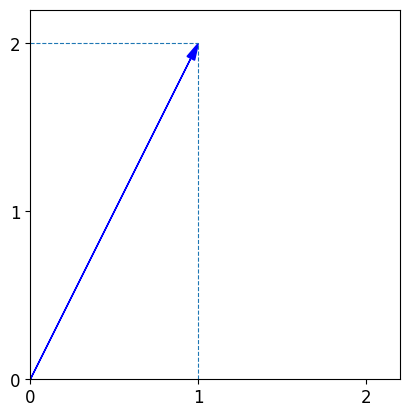

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

xmin = 0
xmax = 2.2
ymin = 0
ymax = 2.2

ax.axis('equal')
ax.set_aspect('equal', 'box')
ax.set(xlim=(xmin, xmax), ylim=(ymin, ymax))


lista_xticks = list(range(int(xmin), int(xmax)+1))
ticks = ax.set_xticks(lista_xticks)
labels = ax.set_xticklabels(lista_xticks, fontsize='large')

lista_yticks = list(range(int(ymin), int(ymax)+1))
ticks = ax.set_yticks(lista_yticks)
labels = ax.set_yticklabels(lista_yticks, fontsize='large')

pt1 = [1,2]

# ax.plot([1],[2],'ro')
ax.arrow(0, 0, pt1[0], pt1[1]
         , head_width=0.05
         , head_length=0.1
         , fc='b', ec='b',
         length_includes_head=True)

ax.vlines(pt1[0], ymin, pt1[1], linestyles='--', linewidth=.8)
ax.hlines(pt1[1], xmin, pt1[0], linestyles='--', linewidth=.8)

## Soma de vetores

Há duas formas de entender a soma de vetores:

- uma puramente algébrica, em que o resultado é um vetor com as mesmas dimensões dos vetores que foram somados, e as novas dimensões são a soma das respectivas coordenadas
- A outra é gráfica, em que colocamos o começo de um vetor na extremidade do outro, e desenhamos um novo vetor do começo do primeiro até a extremidade do último.

Vamos fazer um gráfico no Python ilustrando o conceito visual.

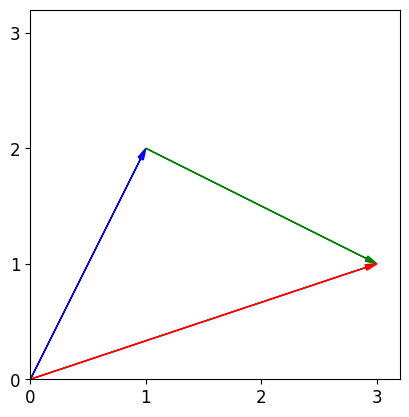

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

xmin = 0
xmax = 3.2
ymin = 0
ymax = 3.2

ax.axis('equal')
ax.set_aspect('equal', 'box')
ax.set(xlim=(xmin, xmax), ylim=(ymin, ymax))

pt1 = [1,2]

# ax.plot([1],[2],'ro')
ax.arrow(0, 0, pt1[0], pt1[1]
         , head_width=0.05
         , head_length=0.1
         , fc='b', ec='b',
         length_includes_head=True)

lista_xticks = list(range(int(xmin), int(xmax)+1))
ticks = ax.set_xticks(lista_xticks)
labels = ax.set_xticklabels(lista_xticks, fontsize='large')

lista_yticks = list(range(int(ymin), int(ymax)+1))
ticks = ax.set_yticks(lista_yticks)
labels = ax.set_yticklabels(lista_yticks, fontsize='large')

# ax.vlines(pt1[0], ymin, pt1[1], linestyles='--', linewidth=.8)
# ax.hlines(pt1[1], xmin, pt1[0], linestyles='--', linewidth=.8)

pt2 = [2, -1]

ax.arrow(pt1[0], pt1[1], pt2[0], pt2[1]
         , head_width=0.05
         , head_length=0.1
         , fc='g', ec='g',
         length_includes_head=True)

ax.arrow(0,0, pt1[0]+pt2[0], pt1[1]+pt2[1]
         , head_width=0.05
         , head_length=0.1
         , fc='r', ec='r',
         length_includes_head=True)

## Multiplicação de vetor por escalar

Um **escalar** é o nome dado em álgebra linear a um "número solto". Esse nome é escolhido pois esse número faz um alteração de escala em um vetor quando são multiplicados.

É uma operação bastante importante, pois uma forma de se enxergar um vetor é através da soma vetorial dos dois vetores da base (\[1, 0\] e \[0, 1\] como a base mais comum) "escalonados" pelas respectivas coordenadas.

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

xmin = 0
xmax = 4.2
ymin = 0
ymax = 4.2

ax.axis('equal')
ax.set_aspect('equal', 'box')
ax.set(xlim=(xmin, xmax), ylim=(ymin, ymax))

lista_xticks = list(range(int(xmin), int(xmax)+1))
ticks = ax.set_xticks(lista_xticks)
labels = ax.set_xticklabels(lista_xticks, fontsize='large')

lista_yticks = list(range(int(ymin), int(ymax)+1))
ticks = ax.set_yticks(lista_yticks)
labels = ax.set_yticklabels(lista_yticks, fontsize='large')

a = 2
v1 = np.array([1,2])
v2 = a*v1

# ax.plot([1],[2],'ro')
ax.arrow(0, 0, v1[0], v1[1]
         , width=0.1
         , head_length=0.1
         , fc='y', ec='y',
         length_includes_head=True)

ax.arrow(0, 0, v2[0], v2[1]
         , head_width=0.1
         , head_length=0.1
         , width=.01
         , fc='b', ec='b',
         length_includes_head=True)
v2

## Transformações lineares

Abaixo trabalharemos com um exemplo simulado que consiste nos dados 10 alunos referentes a 2 provas, ```p1```e ```p2```.

Vamos exercitar essas 3 atividades:
- Visualizar os dados originais no plano cartesiano
- Visualizar os mesmos dados através da média e diferença
- Entender que a nova visualização é uma transformação linear da original
- Refletir sobre duas visualizações dessa transformada

### Dados originais

Aqui vamos simular os dados originais, de 10 alunos, correspondentes a duas provas: ```p1``` e ```p2```.

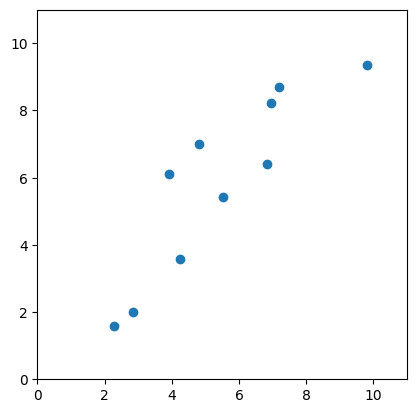

In [ ]:
# Definindo e configurando figura e sistemas de eixos
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.set_aspect('equal', 'box')
ax.set(xlim=(0, 11), ylim=(0, 11))

# Gerando os dados
np.random.seed(123)

p1 = np.random.random(10) *10
p1[p1>10] = 10
p1[p1<0] = 0

p2 = p1 + np.random.normal(0,1,10)
p2[p2>10] = 10
p2[p2<0] = 0
p2

# Gerando o dataframe
df = pd.DataFrame({'p1': p1, 'p2': p2})
#Plotando
plt.scatter(x = df.p1, y=df.p2);

### Média e evolução

Agora vamos calcular média e evolução desses dados como:
- média = (p1+p2)/2
- evolçução = p2-p1

In [ ]:
# Calculando média e evolução
df['média'] = df.mean(axis=1)
df['evolução'] = df.p2-df.p1
df.style.format(precision=1, decimal=',')

,p1,p2,média,evolução
0,"7,0","8,2","7,6","1,3"
1,"2,9","2,0","2,4","-0,9"
2,"2,3","1,6","1,9","-0,7"
3,"5,5","5,4","5,5","-0,1"
4,"7,2","8,7","7,9","1,5"
5,"4,2","3,6","3,9","-0,6"
6,"9,8","9,4","9,6","-0,4"
7,"6,8","6,4","6,6","-0,4"
8,"4,8","7,0","5,9","2,2"
9,"3,9","6,1","5,0","2,2"


### Transformações lineares

Vamos 'brincar' com transformações lineares desses dados via multiplicação matricial. Ao "brincar" com os dados e testar diversas transformações, o objetivo aqui é entender a representação dos dados por ```média``` e ```evolução``` como transformações lineares dos dados originais.

Além disso, podemos brincar com matrizes diferentes e entender o que elas fazem com os dados.

Esse primeiro gráfico plota também os vetores da visualização 1:



Vamos usar esta construção para fazer a transformação linear de todos os pontos do dataframe:



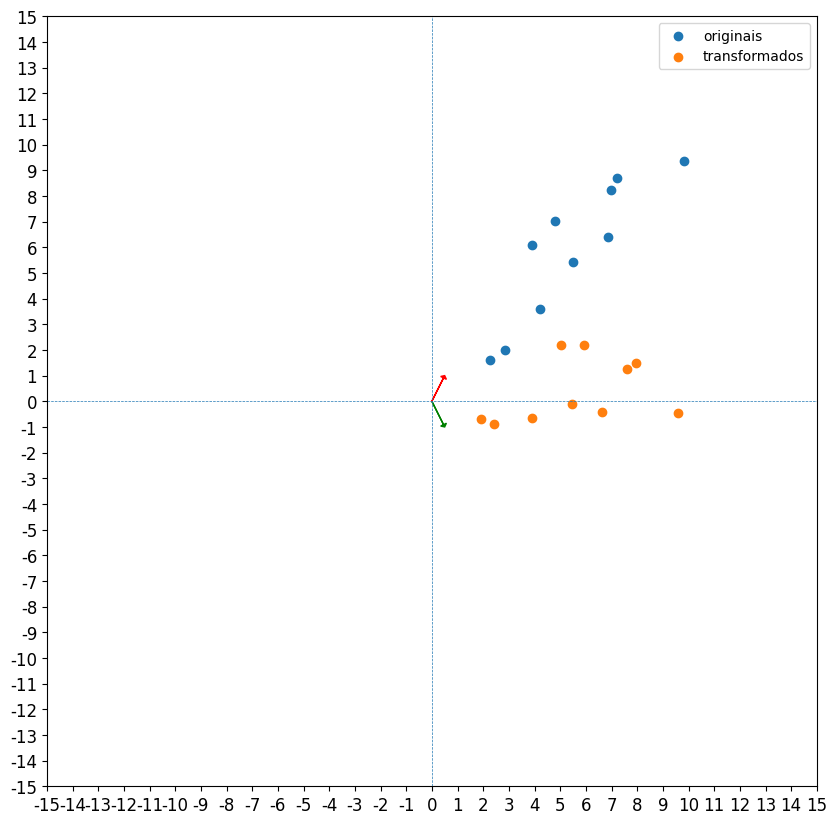

In [ ]:
#Definindo figura e configurando eixos
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1,1,1)

xmin = -15
xmax = 15
ymin = -15
ymax = 15

# ax.axis('equal')
ax.set_aspect('equal', 'box')
ax.set(xlim=(xmin, xmax), ylim=(ymin, ymax))

lista_xticks = list(range(int(xmin), int(xmax)+1))
ticksx = ax.set_xticks(lista_xticks)
labelsx = ax.set_xticklabels(lista_xticks, fontsize='large')

lista_yticks = list(range(int(ymin), int(ymax)+1))
ticksy = ax.set_yticks(lista_yticks)
labelsy = ax.set_yticklabels(lista_yticks, fontsize='large')

#Matriz de transformação
m = np.array([[ .5,.5],
              [ -1, 1]])

# Vetores coluna da matriz de transformação
ax.arrow(0, 0, m[0,0], m[1,0]
         , head_width=0.25
         , head_length=0.1
         , fc='g', ec='g',
         length_includes_head=True)

ax.arrow(0, 0, m[0,1], m[1,1]
         , head_width=0.25
         , head_length=0.1
         , fc='r', ec='r',
         length_includes_head=True)


#linhas horizontais e verticais de referência
ax.axvline(0, linewidth=.5, linestyle='--')
ax.axhline(0, linewidth=.5, linestyle='--')

#Transformação linear
df_rot = np.matmul(m, df[['p1', 'p2']].to_numpy().transpose())

# Plotar os dados originais
plt.scatter(df['p1'], df['p2'], label='originais')

# Plotar os dados transformados
plt.scatter(df_rot[0,:], df_rot[1,:], label='transformados')

#Legenda
plt.legend()

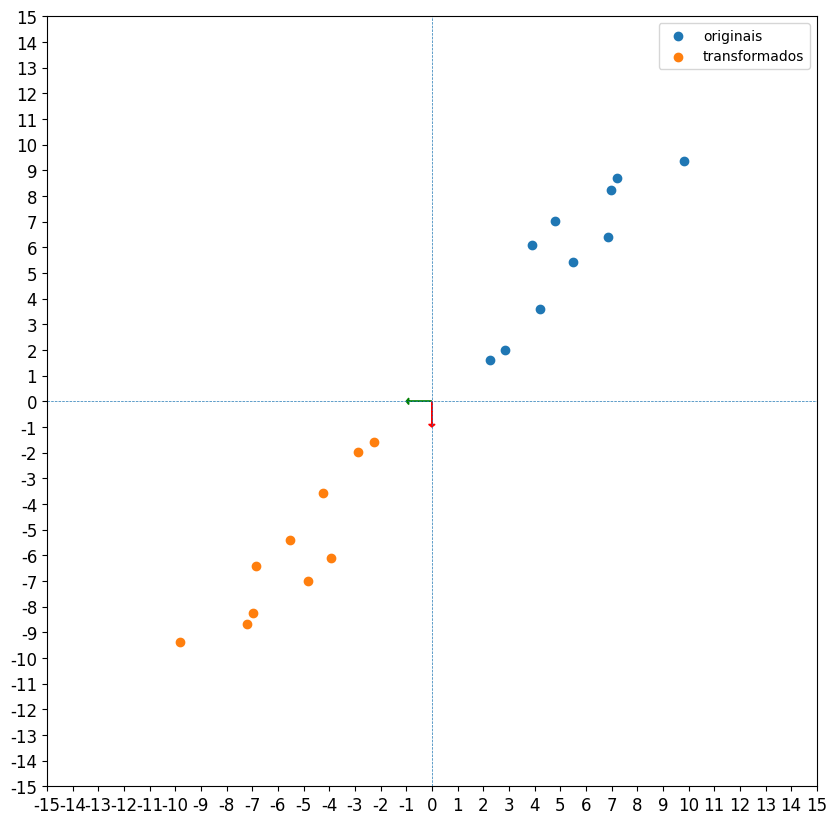

In [ ]:
def transf_lin(m):
    #Definindo figura e configurando eixos
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(1,1,1)

    xmin = -15
    xmax = 15
    ymin = -15
    ymax = 15

    # ax.axis('equal')
    ax.set_aspect('equal', 'box')
    ax.set(xlim=(xmin, xmax), ylim=(ymin, ymax))

    lista_xticks = list(range(int(xmin), int(xmax)+1))
    ticksx = ax.set_xticks(lista_xticks)
    labelsx = ax.set_xticklabels(lista_xticks, fontsize='large')

    lista_yticks = list(range(int(ymin), int(ymax)+1))
    ticksy = ax.set_yticks(lista_yticks)
    labelsy = ax.set_yticklabels(lista_yticks, fontsize='large')

    # Vetores coluna da matriz de transformação
    ax.arrow(0, 0, m[0,0], m[1,0]
             , head_width=0.25
             , head_length=0.1
             , fc='g', ec='g',
             length_includes_head=True)

    ax.arrow(0, 0, m[0,1], m[1,1]
             , head_width=0.25
             , head_length=0.1
             , fc='r', ec='r',
             length_includes_head=True)


    #linhas horizontais e verticais de referência
    ax.axvline(0, linewidth=.5, linestyle='--')
    ax.axhline(0, linewidth=.5, linestyle='--')

    #Transformação linear
    df_rot = np.matmul(m, df[['p1', 'p2']].to_numpy().transpose())

    # Plotar os dados originais
    plt.scatter(df['p1'], df['p2'], label='originais')

    # Plotar os dados transformados
    plt.scatter(df_rot[0,:], df_rot[1,:], label='transformados')

    #Legenda
    plt.legend()

t = np.array([[ -1, 0],
              [ 0, -1]])
transf_lin(t)

### Segunda visualização

Na segunda visualização, temos os vetores nos quais os dados transformados são projetados. Nela enxergamos o que é o "x transformado" e o "y transformado".



No caso do exemplo, o "x transformado" é a média entre ```p1```, e ```p2```, e o "y transformado" é a diferença.



In [ ]:
def translin_v2(m):
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(1,1,1)

    xmin = -2
    xmax = df.p1.max()*1.1
    ymin = -2
    ymax = df.p2.max()*1.1

    ax.axis('equal')
    ax.set_aspect('equal', 'box')
    ax.set(xlim=(xmin, xmax), ylim=(ymin, ymax))

    lista_xticks = list(range(int(xmin), int(xmax)+1))
    ticksx = ax.set_xticks(lista_xticks)
    labelsx = ax.set_xticklabels(lista_xticks, fontsize='large')

    lista_yticks = list(range(int(ymin), int(ymax)+1))
    ticksy = ax.set_yticks(lista_yticks)
    labelsy = ax.set_yticklabels(lista_yticks, fontsize='large')

    ax.axvline(0, linewidth=.5, linestyle='--')
    ax.axhline(0, linewidth=.5, linestyle='--')

    ax.arrow(0, 0, m[0,0], m[0,1]
             , head_width=0.25
             , head_length=0.1
             , fc='g', ec='g',
             length_includes_head=True)

    ax.arrow(0, 0, m[1,0], m[1,1]
             , head_width=0.25
             , head_length=0.1
             , fc='r', ec='r',
             length_includes_head=True)

    plt.scatter(x = df.p1, y=df.p2, label = 'originais')
    plt.scatter(x = df['média'], y=df['evolução'], label = 'transformados')

    ax.legend(loc='upper left')

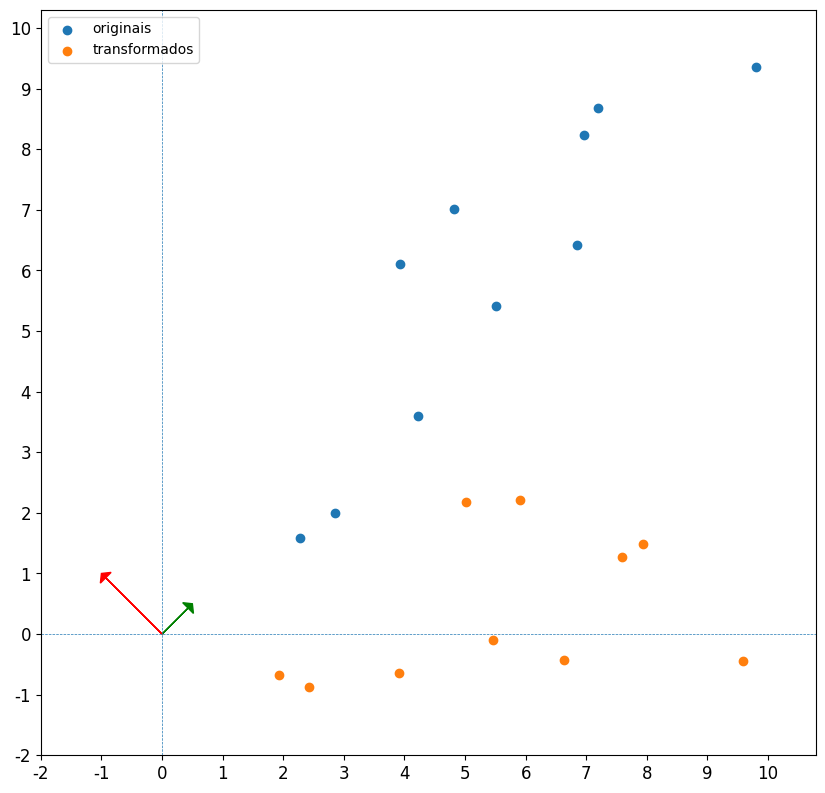

In [ ]:
t = np.array([[ .5, .5],
              [ -1, 1]])
translin_v2(t)

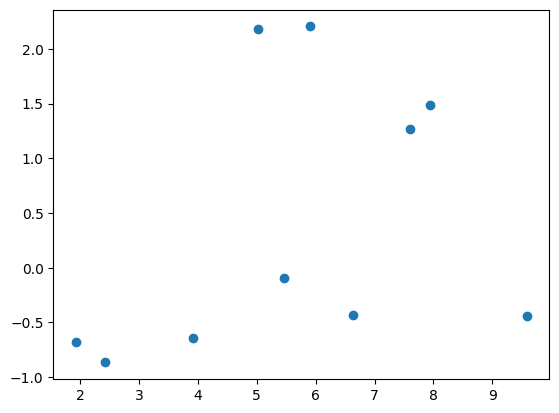

In [ ]:
plt.scatter(x = df['média'], y = df['evolução'])

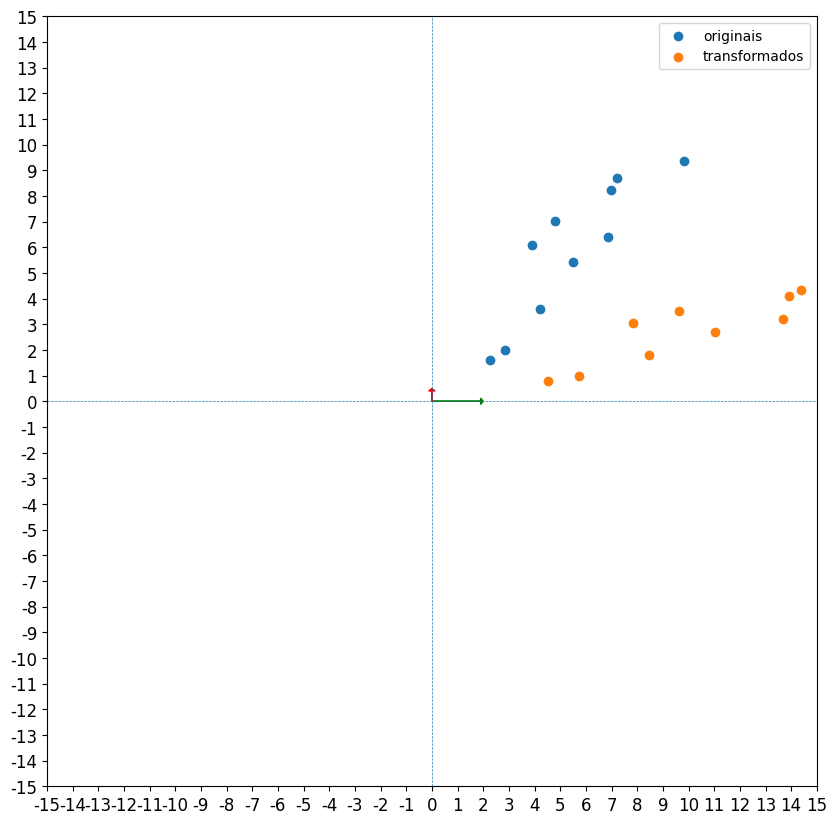

In [ ]:
t_new = np.array([[ 2, 0],
                  [ 0, 0.5]])
transf_lin(t_new)

# Cálculo - Tarefa 02

1- Calcule de forma numérica a integral da função $x^3$ avaliada entre os pontos $1$ e $2$. Identifique o número de retângulos que você usou.  
2- Calcule essa área de forma analítica.

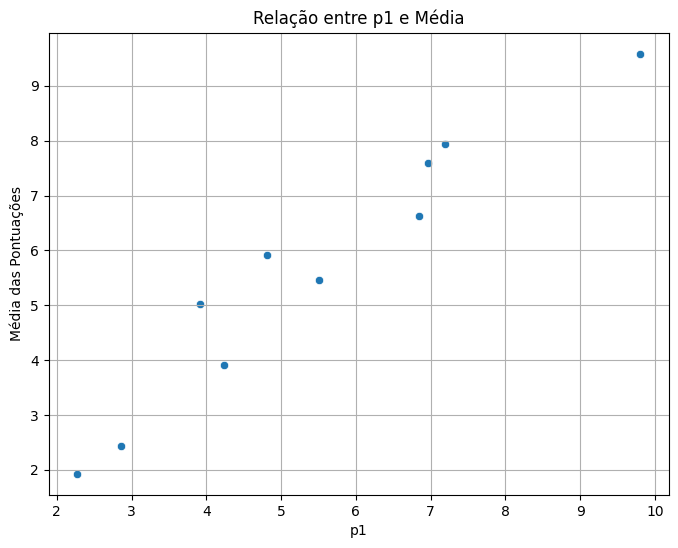

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['p1'], y=df['média'])
plt.title('Relação entre p1 e Média')
plt.xlabel('p1')
plt.ylabel('Média das Pontuações')
plt.grid(True)
plt.show()

## Cálculo da Integral de $x^3$ entre 1 e 2

### 1. Cálculo Numérico da Integral

In [ ]:
import numpy as np

def f(x):
    return x**3

a = 1  # Limite inferior
b = 2  # Limite superior
n = 100000  # Número de retângulos

delta_x = (b - a) / n

# Usando a regra do ponto médio para maior precisão
x_midpoints = np.linspace(a + delta_x/2, b - delta_x/2, n)

integral_numerica = np.sum(f(x_midpoints) * delta_x)

print(f"A integral numérica da função x^3 entre {a} e {b} usando {n} retângulos é: {integral_numerica:.6f}")
print(f"Número de retângulos utilizados: {n}")

A integral numérica da função x^3 entre 1 e 2 usando 100000 retângulos é: 3.750000
Número de retângulos utilizados: 100000


### 2. Cálculo Analítico da Integral

A integral analítica da função $f(x) = x^3$ é dada por:

$$\int x^3 dx = \frac{x^{3+1}}{3+1} + C = \frac{x^4}{4} + C$$

Para calcular a integral definida entre 1 e 2, avaliamos a antiderivada nos limites:

$$\int_{1}^{2} x^3 dx = \left[\frac{x^4}{4}\right]_{1}^{2} = \frac{2^4}{4} - \frac{1^4}{4}$$


In [ ]:
integral_analitica = (2**4 / 4) - (1**4 / 4)

print(f"A integral analítica da função x^3 entre 1 e 2 é: {integral_analitica:.6f}")

A integral analítica da função x^3 entre 1 e 2 é: 3.750000


In [ ]:
correlation_coefficient = df['p1'].corr(df['p2'])
print(f"The correlation coefficient between p1 and p2 is: {correlation_coefficient:.4f}")

The correlation coefficient between p1 and p2 is: 0.8897


## Análise das Colunas 'p1' e 'p2'

In [ ]:
print('Estatísticas Descritivas para p1:')
display(df['p1'].describe())

print('\nEstatísticas Descritivas para p2:')
display(df['p2'].describe())

Estatísticas Descritivas para p1:


,p1
count,10.000000
mean,5.441994
std,2.293522
min,2.268515
25%,3.998648
50%,5.161233
75%,6.935593
max,9.807642



Estatísticas Descritivas para p2:


,p2
count,10.000000
mean,5.841241
std,2.709996
min,1.589628
25%,4.048732
50%,6.260954
75%,7.926783
max,9.363660


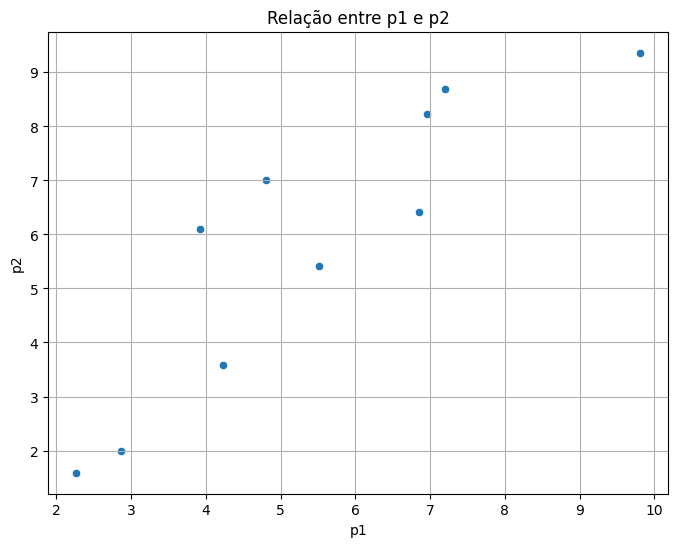

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['p1'], y=df['p2'])
plt.title('Relação entre p1 e p2')
plt.xlabel('p1')
plt.ylabel('p2')
plt.grid(True)
plt.show()

In [ ]:
covariance_matrix = df[['p1', 'p2']].cov()
covariance_p1_p2 = covariance_matrix.loc['p1', 'p2']
print(f"The covariance between p1 and p2 is: {covariance_p1_p2:.4f}")

The covariance between p1 and p2 is: 5.5302


In [ ]:
import plotly.express as px

fig = px.scatter_3d(df, x='p1', y='p2', z='média', color='média',
                    title='Interactive 3D Scatter Plot of p1, p2, and Média')
fig.show()

## Análise da Coluna 'média'

In [ ]:
print('Estatísticas Descritivas para média:')
display(df['média'].describe())

Estatísticas Descritivas para média:


,média
count,10.000000
mean,5.641617
std,2.432315
min,1.929071
25%,4.187352
50%,5.689039
75%,7.356025
max,9.585651


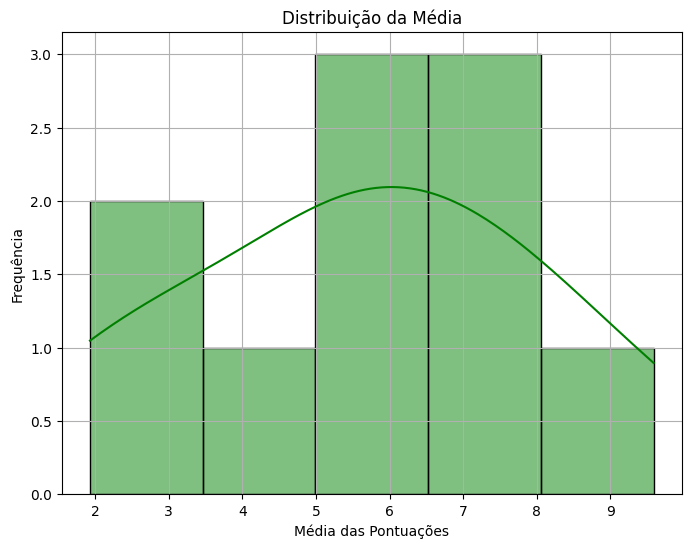

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.histplot(df['média'], kde=True, bins=5, color='green')
plt.title('Distribuição da Média')
plt.xlabel('Média das Pontuações')
plt.ylabel('Frequência')
plt.grid(True)
plt.show()

In [ ]:
import plotly.express as px

fig = px.scatter_3d(df, x='p2', y='evolução', z='p1', color='p1',
                    title='Interactive 3D Scatter Plot of p2, Evolução, and p1')
fig.show()

In [ ]:
import plotly.express as px

fig = px.scatter_3d(df, x='p1', y='p2', z='evolução', color='média',
                    title='Interactive 3D Scatter Plot of p1, p2, Evolução, and Média (Colored by Média)')
fig.show()

In [ ]:
import plotly.express as px

fig = px.scatter_3d(df, x='p1', y='evolução', z='média', color='evolução',
                    title='Interactive 3D Scatter Plot of p1, Evolução, and Média')
fig.show()

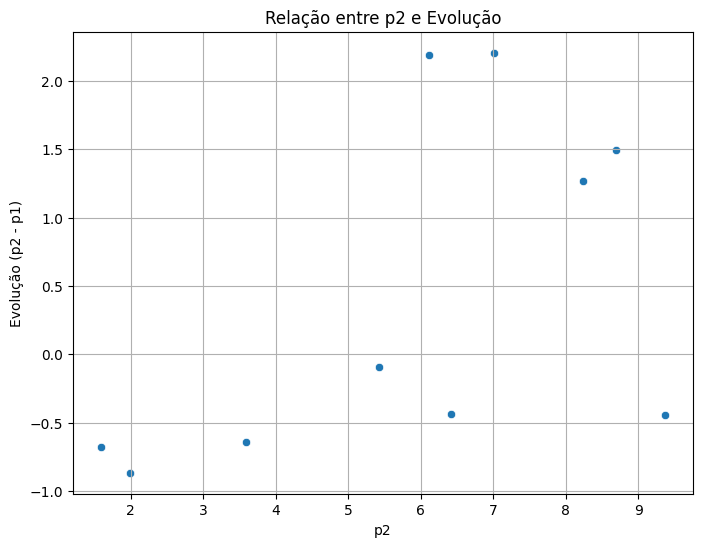

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['p2'], y=df['evolução'])
plt.title('Relação entre p2 e Evolução')
plt.xlabel('p2')
plt.ylabel('Evolução (p2 - p1)')
plt.grid(True)
plt.show()

In [ ]:
correlation_matrix_all = df.corr()
print("Correlation Matrix for all numeric columns:")
display(correlation_matrix_all)

Correlation Matrix for all numeric columns:


,p1,p2,média,evolução
p1,1.000000,0.889746,0.967130,0.094710
p2,0.889746,1.000000,0.976569,0.538673
média,0.967130,0.976569,1.000000,0.344738
evolução,0.094710,0.538673,0.344738,1.000000


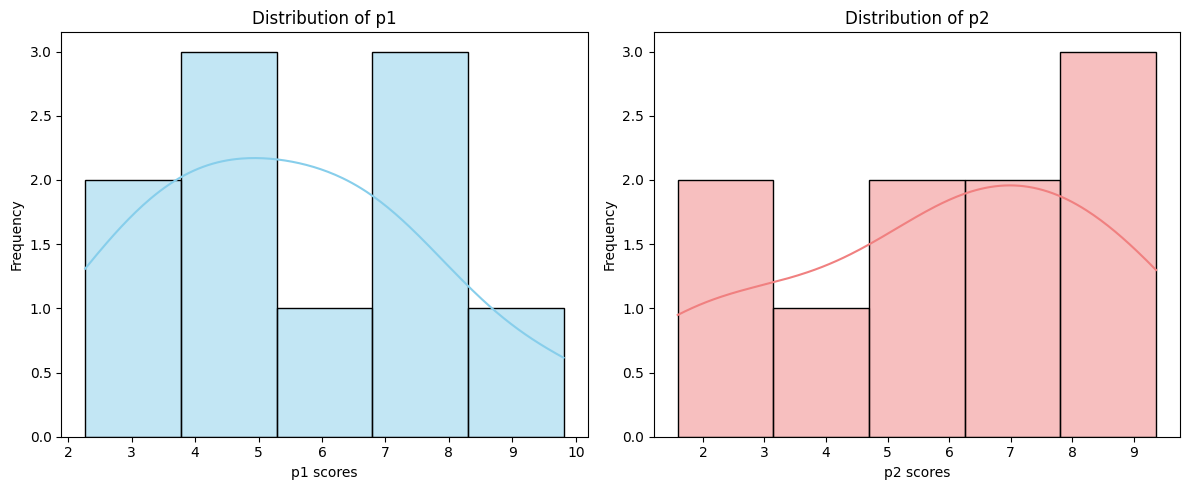

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1) # 1 row, 2 columns, first plot
sns.histplot(df['p1'], kde=True, bins=5, color='skyblue')
plt.title('Distribution of p1')
plt.xlabel('p1 scores')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2) # 1 row, 2 columns, second plot
sns.histplot(df['p2'], kde=True, bins=5, color='lightcoral')
plt.title('Distribution of p2')
plt.xlabel('p2 scores')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

**Resumo:**

Cálculo da Integral:
Validamos a precisão do cálculo numérico da integral de
𝑥
3
x
3
 no intervalo
[
1
,
2
]
[1,2], comparando-o ao resultado analítico. Essa verificação reforça a confiança nas simulações computacionais como ferramenta complementar à solução exata.

Álgebra Linear e Transformações:
Revisitamos conceitos fundamentais de vetores e exploramos transformações lineares como forma de reinterpretar os dados. Por meio dessas transformações, evidenciamos novas perspectivas — como a representação das notas em termos de média e evolução — mostrando como operações matriciais revelam dimensões escondidas nos dados originais.

Análise de Dados:
Examinamos as notas das provas (p1 e p2) e suas métricas derivadas, identificando uma forte correlação positiva entre as avaliações. Complementamos com estatísticas descritivas, histogramas e visualizações 3D interativas que permitiram observar, de forma intuitiva, padrões e relações não triviais entre as variáveis, enriquecendo a compreensão do comportamento dos estudantes.

Em suma, a análise dos dados e gráficos demonstrou uma forte ligação entre o desempenho nas duas provas. As visualizações 3D foram fundamentais para explorar a complexa interação entre as notas individuais, a média e a evolução, revelando padrões que ajudam a entender a consistência e a variação no desempenho dos alunos.


**Conclusão**

Neste trabalho revisamos alguns conceitos básicos de álgebra linear e sua aplicação na análise de dados. Começamos explorando a soma de vetores tanto de forma algébrica, somando coordenada por coordenada, quanto de forma gráfica, visualizando o vetor resultante como a diagonal formada pela combinação dos dois vetores. Em seguida, validamos o cálculo numérico da integral de
𝑥
3
x
3
 no intervalo de 1 a 2, comparando-o com o resultado analítico e mostrando como simulações computacionais podem complementar o cálculo exato. Também utilizamos transformações lineares para reinterpretar as notas das duas provas (p1 e p2), gerando novas variáveis como média e evolução. Por meio de estatísticas simples, gráficos e visualizações 3D, observamos uma forte relação entre as duas provas e entendemos melhor o comportamento dos alunos. No conjunto, o uso de vetores, transformações e diferentes representações dos dados ajudou a revelar padrões importantes e a compreender de forma mais clara a consistência e a variação no desempenho dos estudantes.